In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = {
    'Size_sqft': [1000, 1500, 1800, 2400, 3000, 3500, 4000, 4500, 5000, 6000],
    'Rooms': [2, 3, 3, 4, 4, 5, 5, 6, 6, 7],
    'Price': [200000, 250000, 270000, 320000, 360000, 400000, 450000, 480000, 500000, 550000]
}

df = pd.DataFrame(data)

X = df[['Size_sqft', 'Rooms']]
y = df['Price']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [5]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [6]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)

Mean Squared Error: 28479549.33
R² Score: 0.998
Coefficients: [   49.55896683 22375.23243361]
Intercept: 115755.83768291486


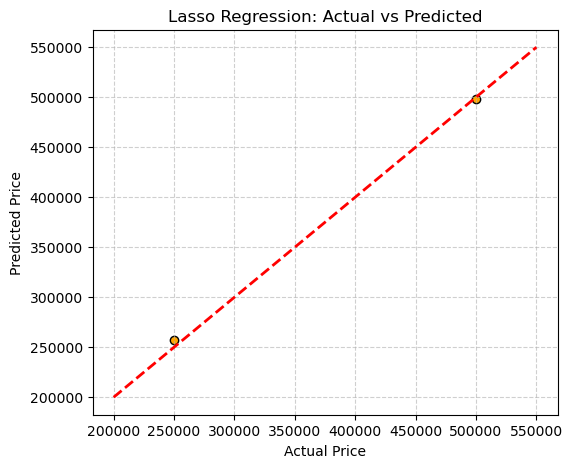

In [7]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='orange', edgecolors='black', linewidths=1)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression: Actual vs Predicted")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [8]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
r2_scores = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    r2_scores.append(lasso.score(X_test, y_test))

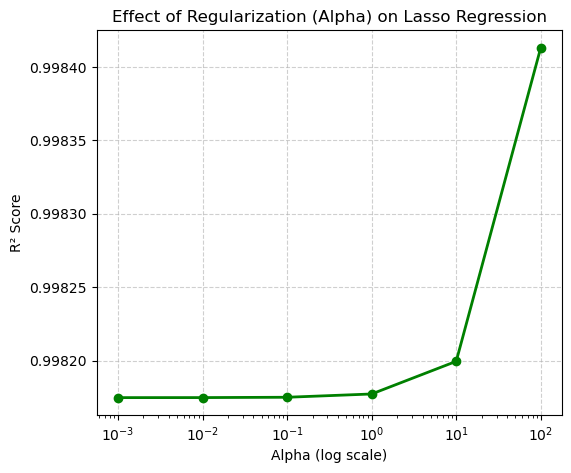

In [9]:
plt.figure(figsize=(6,5))
plt.plot(alphas, r2_scores, marker='o', linewidth=2, color='green')
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Effect of Regularization (Alpha) on Lasso Regression")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()